## Importing libraries

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
sns.set()
sns.set(style = 'darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Load and review Data
#### Importing Data file

In [2]:
blData = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
blData.head(50)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Exploratory Data Aanalytics

In [4]:
blData.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
blData.shape

(5000, 14)

In [6]:
blData[~blData.applymap(np.isreal).all(1)] , blData.shape

(Empty DataFrame
 Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
 Index: [], (5000, 14))

In [8]:
blData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
blData.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
blData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Finding the unique values per attribute

In [55]:
blData.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### From the dataset, 

We can see that there are variables that can be ignored (categorical variables, as they dont have any effect on the modelling: ID, Zipcode

From the above detail, we find that there are quite a few bivariate columns and few columns with variables less than 5. These will be the primary focus for visualization against the target variable.

#### Target Variable is "Personal Loan" : Describes whether that person has taken loan or not. this is to be predicted.

Dependent variables related to customer and their background that can influence the outcome: Age - Age of the customer Experience - Professional Experience in users Income - Annual income of customer Family - Family Size of customer (Categorical variable) CCAverage - average cc spending per month Education - Level of education of the customer (Categorical variable) 1 = Undergraduate 2 = Graduate 3 = Post Graduate Mortgage - value of the house mortgage

Dependent variables Related to the bank that can be considered are:

Securities Account - Do they have securities account with bank or not?
CD Account         - Do they have a CD Account with bank or not?
Online             - Do they use internet banking or not?
Credit Card        - Do they use credit card or not?
It can be seen that the "Experience" variable has negative values, which could possibly mean some error in data.

Hence let us replace those values with the absolute values as it could have been a typing error.

Here we are not taking the mean value into consideration because the mean of Experience column is 20 years.

In [11]:
blData['Experience'] = blData["Experience"].abs()
blData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
blData.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


From the above we can see that the data is having a huge bias (almost 1:10) towards the category of people not accepting the personal loan.

Hence we can form opinion that our model will tend to perform better towards predicting which customers wont accept the personal loan.

However, our problem is to identify the customers that can accept personal loan based on the selected available features

In [13]:
blData0 = blData.groupby('Personal Loan')
blData0 = blData0.get_group(0)
blData0.shape , blData0.describe().transpose()

((4520, 14),
                      count          mean          std     min       25%  \
 ID                  4520.0   2512.165487  1448.299331     1.0   1259.75   
 Age                 4520.0     45.367257    11.450427    23.0     35.00   
 Experience          4520.0     20.165487    11.398146     0.0     10.00   
 Income              4520.0     66.237389    40.578534     8.0     35.00   
 ZIP Code            4520.0  93152.428761  2156.949654  9307.0  91911.00   
 Family              4520.0      2.373451     1.148771     1.0      1.00   
 CCAvg               4520.0      1.729009     1.567647     0.0      0.60   
 Education           4520.0      1.843584     0.839975     1.0      1.00   
 Mortgage            4520.0     51.789381    92.038931     0.0      0.00   
 Personal Loan       4520.0      0.000000     0.000000     0.0      0.00   
 Securities Account  4520.0      0.102212     0.302961     0.0      0.00   
 CD Account          4520.0      0.035841     0.185913     0.0      0.00   

In [14]:
blData1 = blData.groupby('Personal Loan')
blData1 = blData1.get_group(1)
blData1.shape , blData1.describe().transpose()

((480, 14),
                     count          mean          std      min       25%  \
 ID                  480.0   2390.650000  1394.393674     10.0   1166.50   
 Age                 480.0     45.066667    11.590964     26.0     35.00   
 Experience          480.0     19.843750    11.582443      0.0      9.00   
 Income              480.0    144.745833    31.584429     60.0    122.00   
 ZIP Code            480.0  93153.202083  1759.223753  90016.0  91908.75   
 Family              480.0      2.612500     1.115393      1.0      2.00   
 CCAvg               480.0      3.905354     2.097681      0.0      2.60   
 Education           480.0      2.233333     0.753373      1.0      2.00   
 Mortgage            480.0    100.845833   160.847862      0.0      0.00   
 Personal Loan       480.0      1.000000     0.000000      1.0      1.00   
 Securities Account  480.0      0.125000     0.331064      0.0      0.00   
 CD Account          480.0      0.291667     0.455004      0.0      0.00   


##### Lets drop the ID categorical variable for the plotting

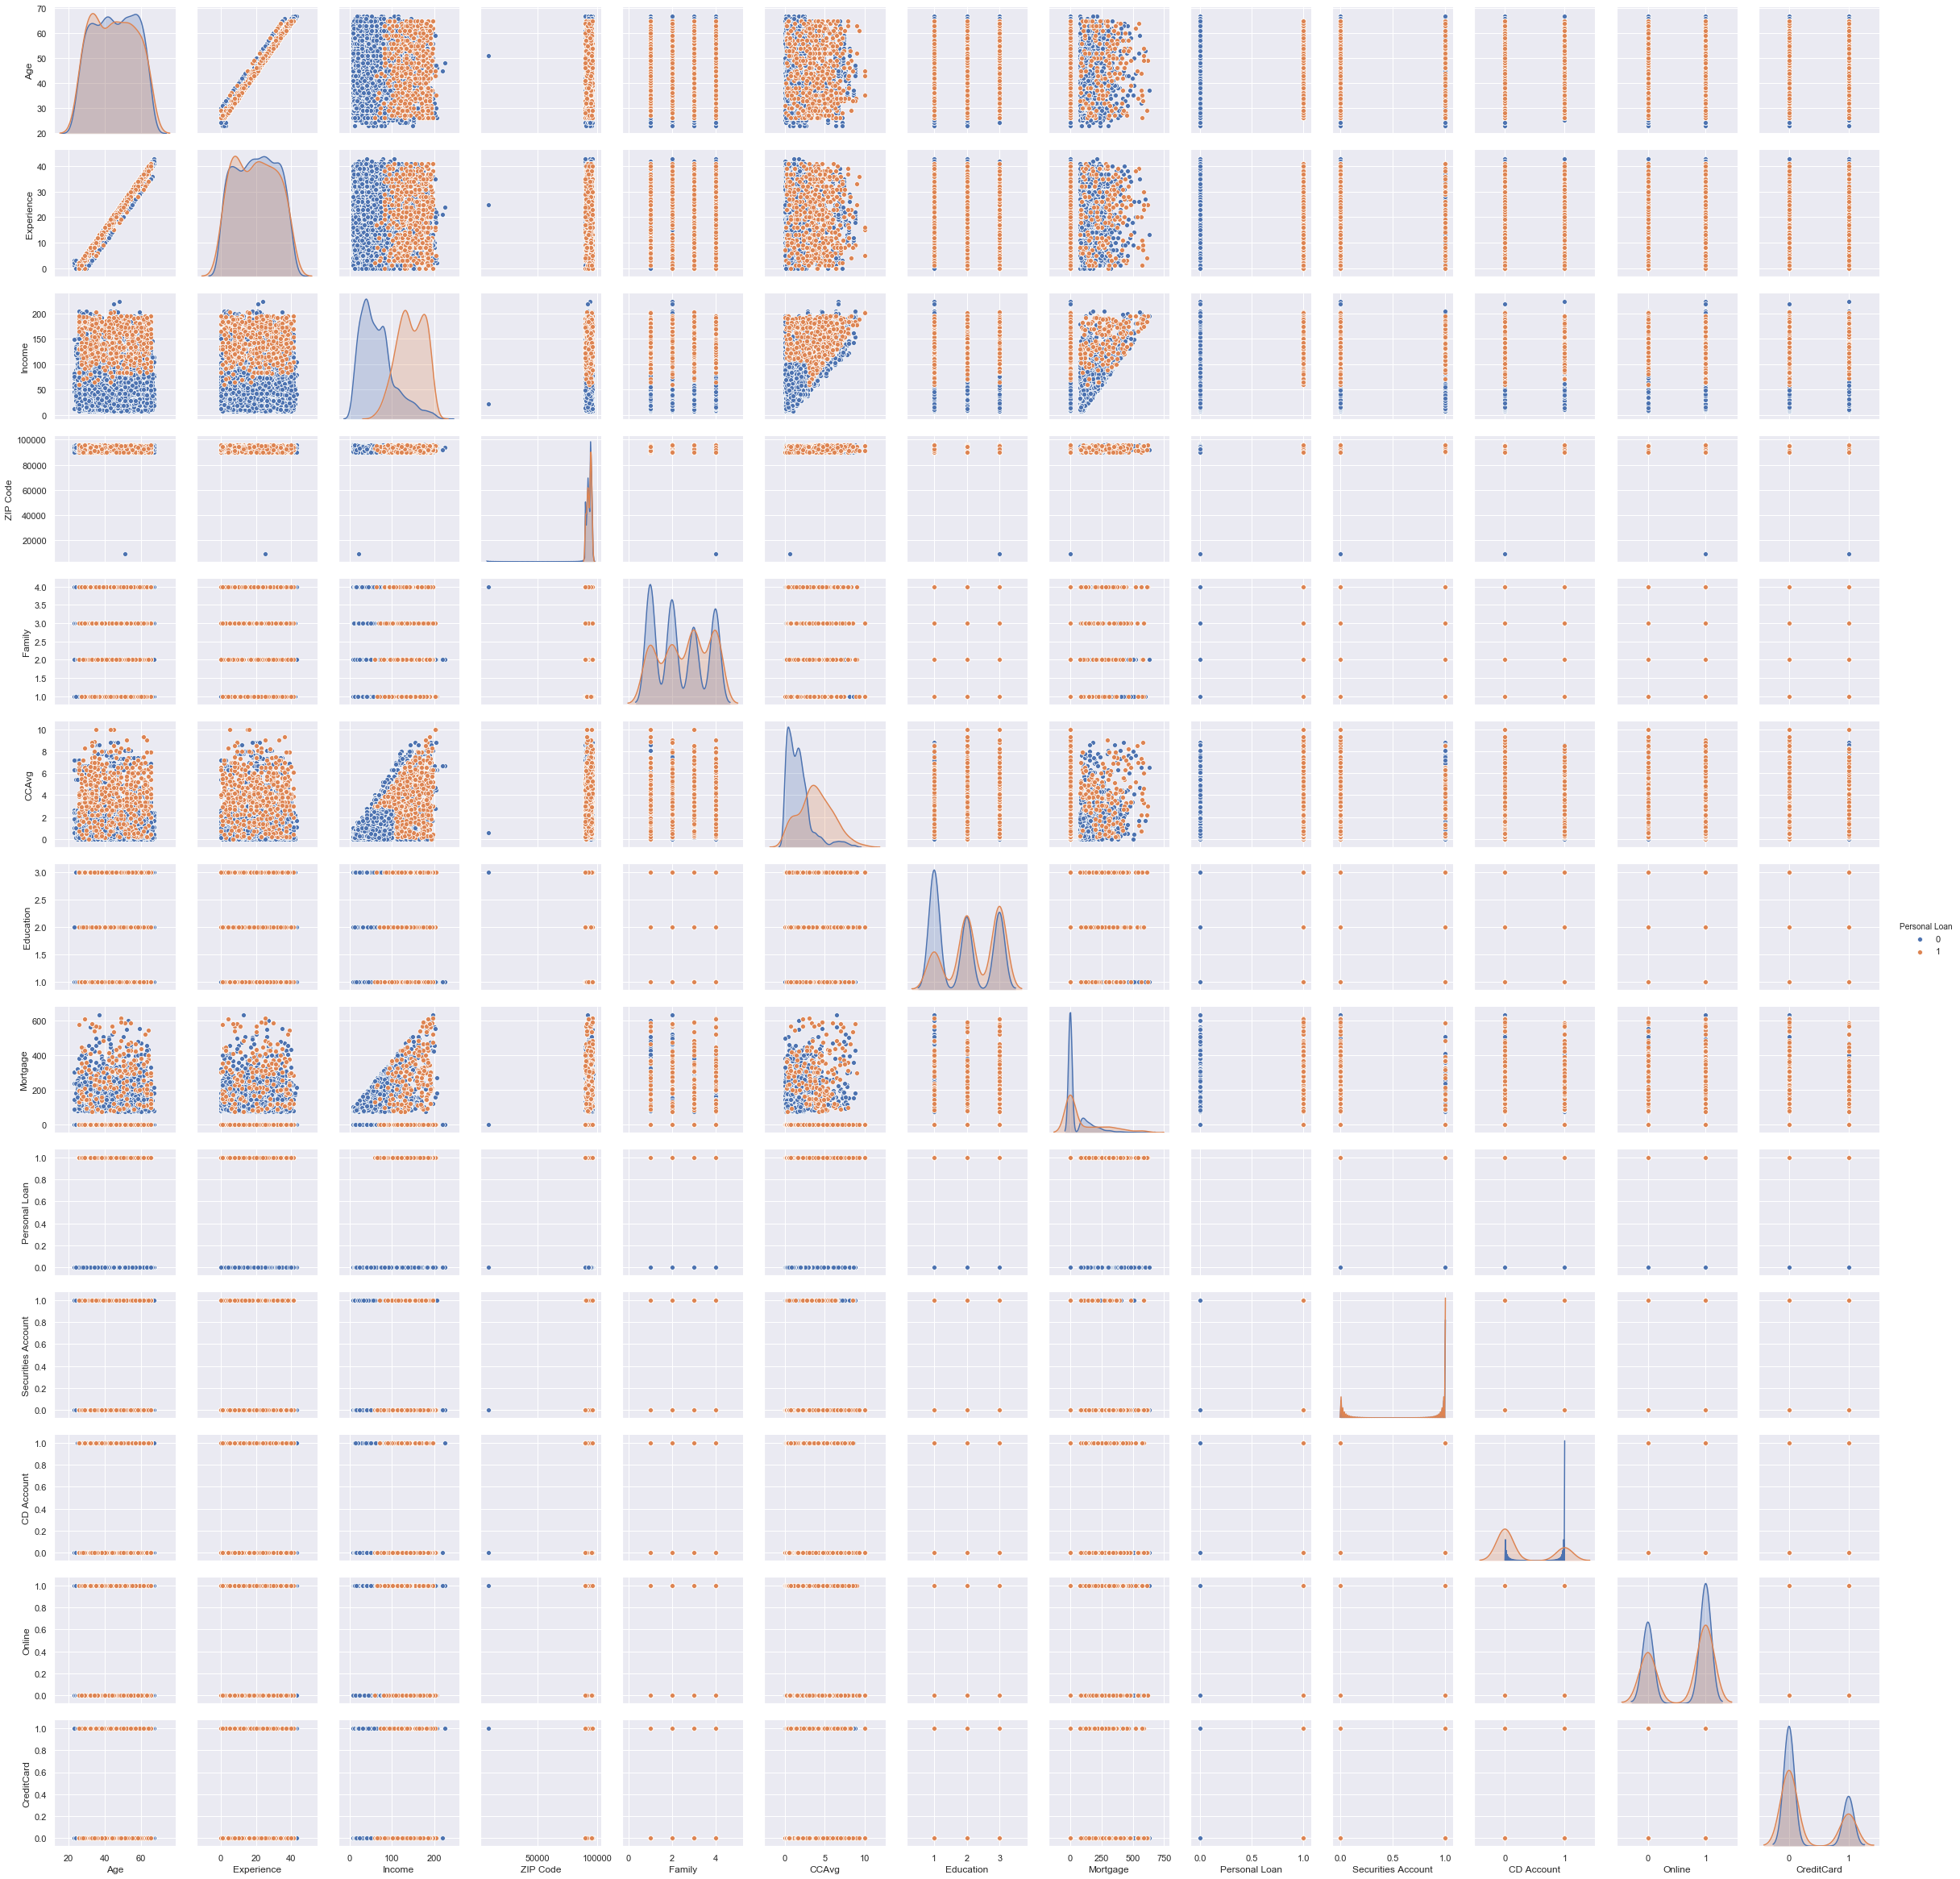

In [15]:
sns.pairplot(blData.iloc[:,1:], hue='Personal Loan')

## From the above we are able to infer the following:

#### Income is positively skewed as mean > median and most of income earners are between 40K to 60K
#### Average spending is between 0K to 10K and majority spends less than 2.5K
#### 70% indiviuals have mortgage less than 40K

## DATA VISUALIZATION

#### Age Distribution plot from both the data sets

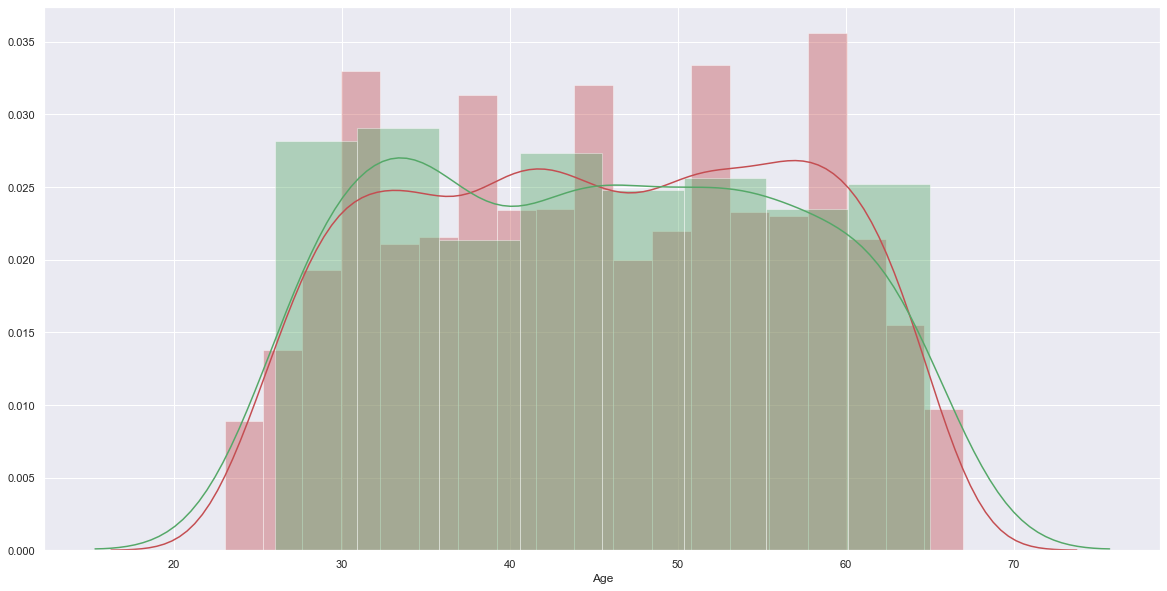

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(blData0['Age'],color='r')
sns.distplot(blData1['Age'],color='G')

#### Age is normally distributed, with mean and median almost the same

#### Experience Distribution plot from both the data sets

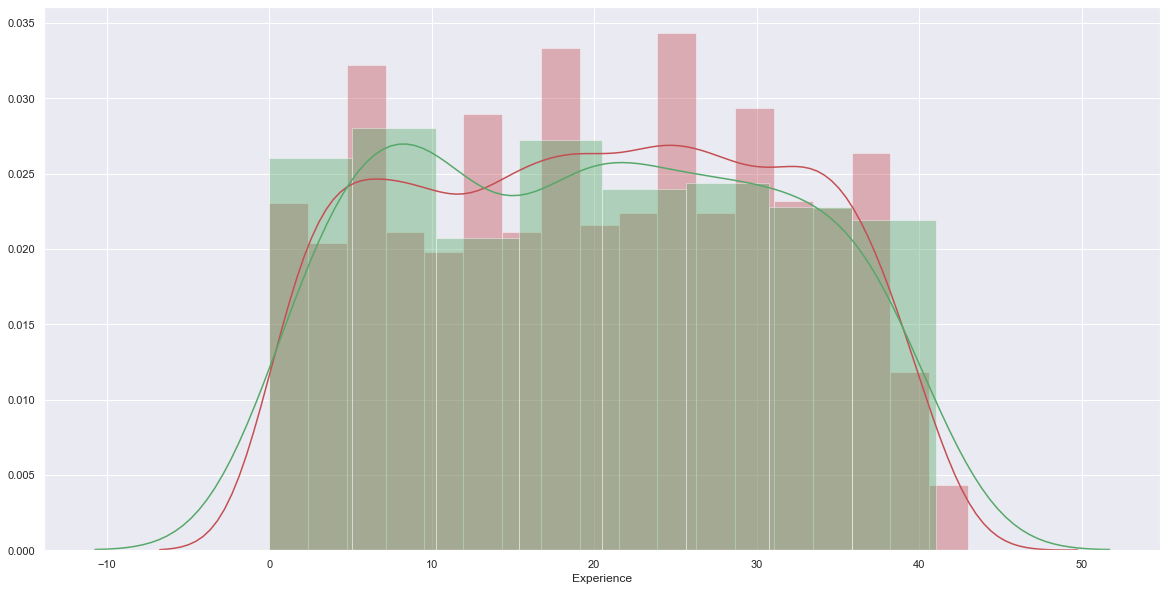

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(blData0['Experience'], color ='r')
sns.distplot(blData1['Experience'], color ='G')

#### Experience is normally distributed, with mean and median almost the same

#### CC Avg Distribution plot from both the data sets

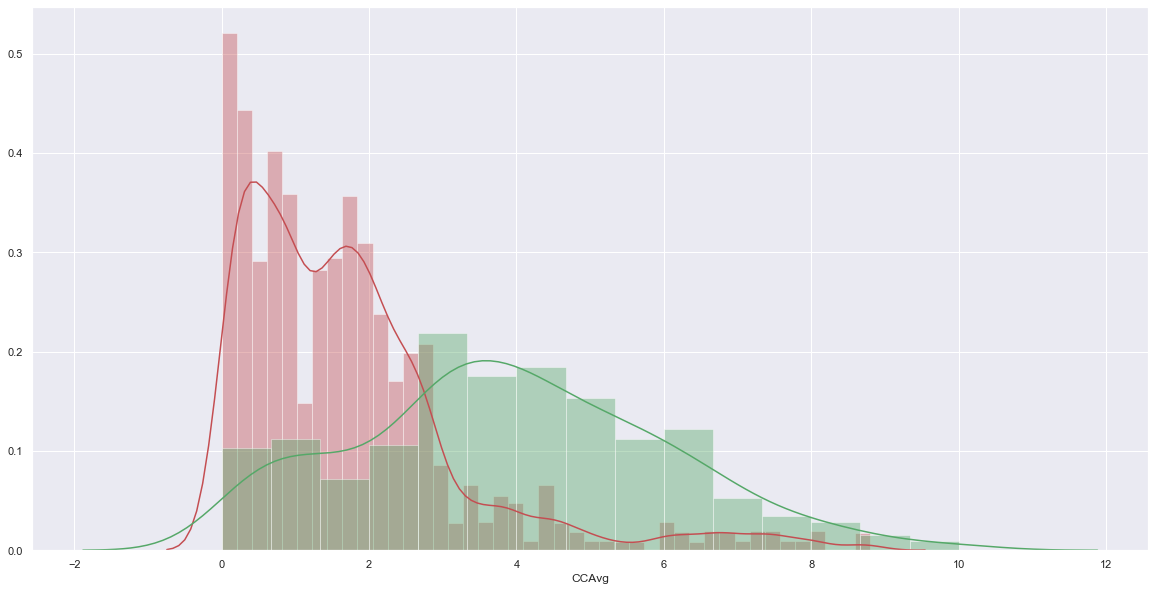

In [20]:
plt.figure(figsize=(20,10))
sns.distplot(blData0['CCAvg'], color ='r')
sns.distplot(blData1['CCAvg'], color ='G')

 #### Income and CCAvg are positively skewed.

#### Income Vs Education on Personal Loan

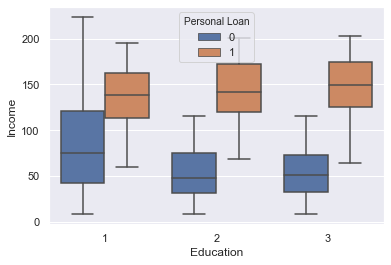

In [63]:
sns.boxplot('Education','Income',hue='Personal Loan',data=blData)

#### Customers with education level 1 have a high income and loan takers have the same income levels.

#### Mortgage Vs Education on Personal Loan

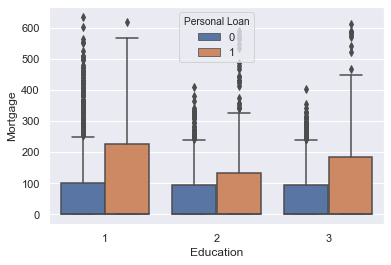

In [64]:
sns.boxplot('Education','Mortgage',hue='Personal Loan',data=blData)

#### From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

#### Family Vs Income on Personal Loan

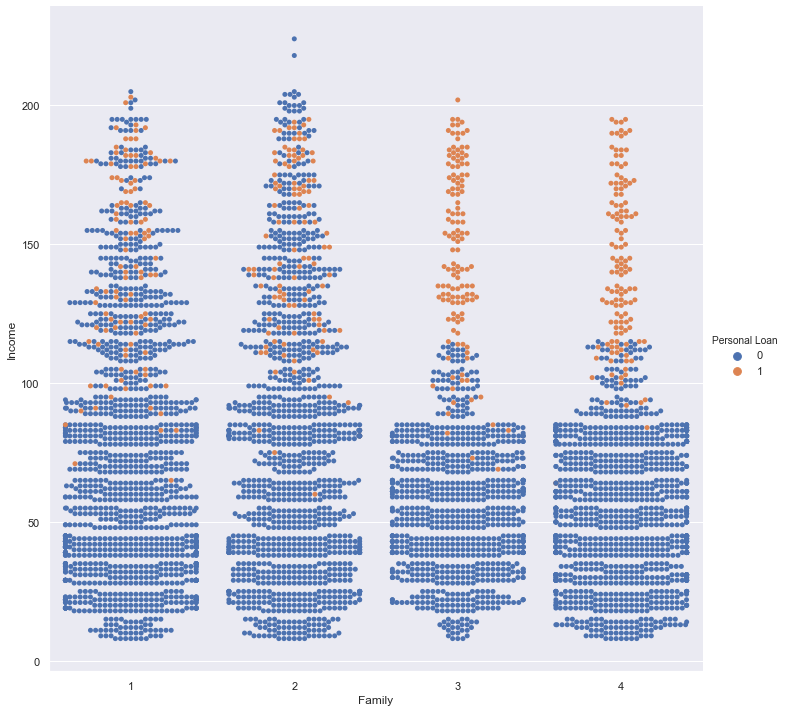

In [23]:
sns.catplot(x='Family', y='Income', hue ='Personal Loan', data = blData, kind='swarm', height=10, aspect=1)

#### Families with income < 100K tend to accept personal loans
#### From above, we can see that customers with family > 3 are good prospective customers.

#### Heat Map on Personal Loan

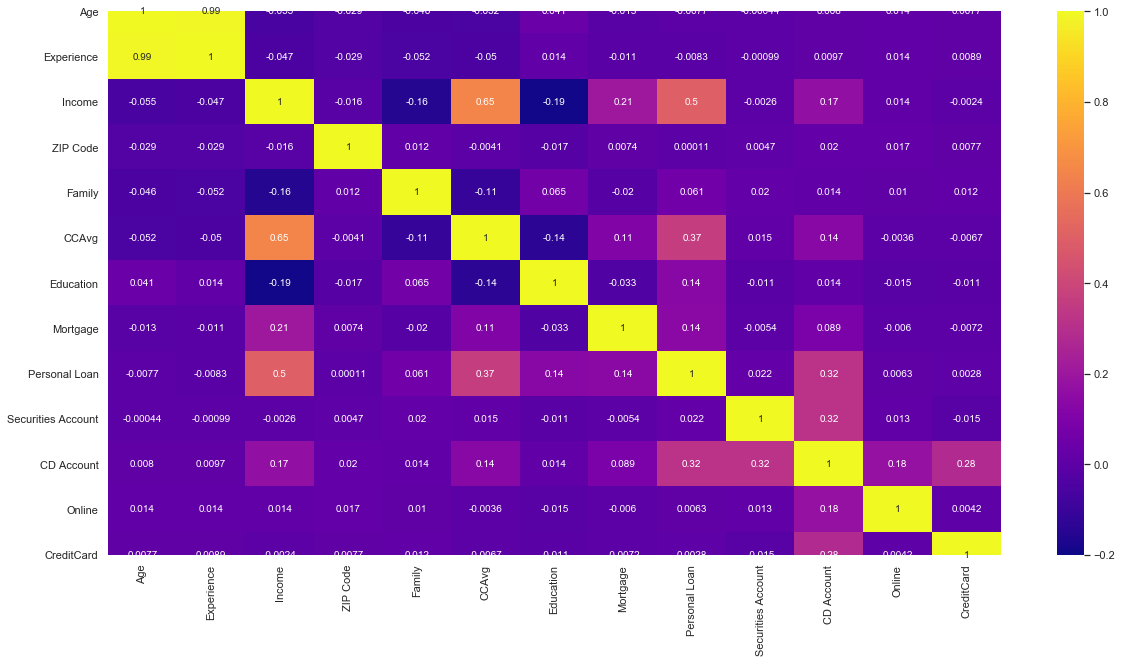

In [56]:
blData_nid= blData.drop('ID', axis=1)
corr = blData_nid.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='plasma',vmin=-0.2,vmax=1)

### Observations:
##### 1. Age and Experience are highlt correlated
##### 2. Personal Loan has maximum correlation with : (Income, CCAvg, CD Account, Mortgage and Education)
##### 3. CD Account is again dependent on (Credit Card, Securities Account, Online, CCAvg and Income)
##### 4. Mortgage has moderate correlation with Income.
##### 5. Income influences CCAvg, Personal Loan, Mortgage, CD Account.

## SPLIT DATASET INTO TRAINING AND TEST

In [32]:
blData.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [34]:
X = blData.drop(['ID','Experience','Personal Loan'], axis=1)
y = blData['Personal Loan']

##### X Axis : We are dropping ID as it is Non Integer value and doesnot affect the data set at all. We dropped experience as it is correlated to Age.
##### Both X and Y Axis: We are dropping personal loan as we are using that as a target variable.

In [35]:
X.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Import libraries for performing the splitting of DF into testing and training set. 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Split into 70:30 of training:testing

In [36]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## MODEL BUILDING - LOGISTIC REGRESSION

Importing libraries from the SCIKIT LEARN

In [38]:
from sklearn.linear_model import LogisticRegression
model1a = LogisticRegression()

#### Apply training data to the logistic regression model

In [39]:
model1a.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predict the test results

In [40]:
y_predict = model1a.predict(X_test)

#### Calculate the coefficients of logistic regression model

In [42]:
t = list(X_train.columns)
coef_blData = pd.DataFrame(model1a.coef_, columns= t)
coef_blData['intercept'] = model1a.intercept_
print(coef_blData)

        Age    Income  ZIP Code    Family     CCAvg  Education  Mortgage  \
0  0.007155  0.037557 -0.000071  0.015505  0.005647   0.018257  0.000537   

   Securities Account  CD Account    Online  CreditCard  intercept  
0            0.001144    0.004903 -0.000517   -0.000134  -0.000084  


#### Calculate the model score and print confusion matrix

In [43]:
model1a_score = model1a.score(X_test, y_test)
print(model1a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8993333333333333
[[1302   58]
 [  93   47]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1360
           1       0.45      0.34      0.38       140

    accuracy                           0.90      1500
   macro avg       0.69      0.65      0.66      1500
weighted avg       0.89      0.90      0.89      1500



### Conclusion - Logistic Regression Model
##### Model accuracy is 0.8993 ~ 0.90
##### True Positives = 47
##### True Negatives = 1302
##### False Positives= 58
##### False Negatives= 93

## MODEL BUILDING - NAIVE BAYES

Importing lbraries from the SCIKIT LEARN

In [44]:
from sklearn.naive_bayes import GaussianNB

#### Apply training data to the Naive Bayes model

In [45]:
model2a = GaussianNB()
model2a.fit(X_train,y_train)
y_predict = model2a.predict(X_test)
model2a_score = model2a.score(X_test, y_test)

#### Calculate the model score and print confusion matrix


In [46]:
print(model2a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.886
[[1243  117]
 [  54   86]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1360
           1       0.42      0.61      0.50       140

    accuracy                           0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



### Conclusion - Logistic Regression Model

##### Model accuracy is 0.886
##### True Positives = 86
##### True Negatives = 1243
##### False Positives= 117
##### False Negatives= 54

## MODEL BUILDING - k-Nearest Neighbors (KNN)

Importing lbraries from the SCIKIT LEARN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

#### Apply training data to the KNN model

In [48]:
NNH_a= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH_a.fit(X_train, y_train)
y_predict = NNH_a.predict(X_test)
NNH_a_score = NNH_a.score(X_test, y_test)

#### Calculate the model score and print confusion matrix

In [49]:
print(NNH_a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8813333333333333
[[1280   80]
 [  98   42]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1360
           1       0.34      0.30      0.32       140

    accuracy                           0.88      1500
   macro avg       0.64      0.62      0.63      1500
weighted avg       0.87      0.88      0.88      1500



### Conclusion - Logistic Regression Model
##### Model accuracy is 0.881
##### True Positives = 42
##### True Negatives = 1280
##### False Positives= 80
##### False Negatives= 98

## COMPARISON OF MODELS

In [53]:
Model_Accuracy = {'Logistic Regression': model1a_score, 'Naive Bayes': model2a_score, 'K-Nearest Neighbors': NNH_a_score}

#### Print Overall Comparison Results

In [54]:
print('Model Accuracy:')
print (Model_Accuracy)
print('\n')

Model Accuracy:
{'Logistic Regression': 0.8993333333333333, 'Naive Bayes': 0.886, 'K-Nearest Neighbors': 0.8813333333333333}




### Conclusion
##### From the above, we can clearly see that Logistic Regression algorithm gives us the best accuracy of 89.93%
##### Hence the Logistic Regression Model seems to be the best choice to predict the customers who will accept the personal loan¶
